In [44]:
import numpy  as np
import pandas as pd

import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score 

from sklearn.model_selection import KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

## 학습목표(데이터 전처리)
- 결측치 처리(missingno), 이상치 처리(박스플롯)
- 데이터 인코딩(문자를 숫자로 변환하는 과정)
- 인코딩 방법(레이블 인코딩, 원-핫 인코딩)
- 데이터 인코딩 회귀 X, 원-핫 인코딩은 트리계열 알고리즘에 적용할 경우 최적화 된다.
- 트리계열 알고리즘 중에서 성능이 떨어지는 단점이 있을 수 있다. > 숫자의 특성이 반영되기 때문에 성능이 떨어진다.
- feature scaling -> 정규화, 표준화
- 정규화(0과 1 값으로 변환 - MinMaxScalar())
- 표준화(정규분포를 따를는 형식으로 평균이 0이고 분산이 1인 가우시안 분포 변환 - StandardScalar)
- feature important(모든 feature의 값이 정답에 영향을 미치진 않기에 어느 feature가 정답에 영향을 미치는지 확인해야 함)

In [18]:
iris=load_iris()
print(type(iris))
print(type(iris.keys()))
print(type(iris.values()))
display(iris)

<class 'sklearn.utils.Bunch'>
<class 'dict_keys'>
<class 'dict_values'>


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
X_train, X_test, y_train, y_test=train_test_split(iris.data,
                                                 iris.target,
                                                 test_size=0.2,
                                                 random_state=200)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#타입 확인


((120, 4), (30, 4), (120,), (30,))

- 불순도(impurity) - 해당 범주안에 서로 다른 데이터가 얼마나 섞여있는지
- 엔트로피(entropy) - 불순도를 수치적으로 나타낸 척도
- 지니(gini) - 불순도를 수치적으로 나타낸 척도

In [24]:
gscv_dtc_model = DecisionTreeClassifier() #다양한 옵션 찾아보자
param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1,2,3],
    'min_samples_split' : [2,3],
    'splitter':['random','best']
}

In [25]:
print('GridSearchCV를 이용한 최적의 모델을 만드는 방법 -')
grid_tree=GridSearchCV(gscv_dtc_model,
                      param_grid=param,
                      cv=5,
                      refit=True)

GridSearchCV를 이용한 최적의 모델을 만드는 방법 -


In [101]:
grid_tree.fit(X_train, y_train)
print(type(grid_tree.cv_results_))
grid_tree.cv_results_ # GridSearchCV의 결과 값을 저장하는 곳 (딕셔너리 타입)

<class 'dict'>


{'mean_fit_time': array([0.00059867, 0.00041018, 0.00080247, 0.00087337, 0.00102973,
        0.00103998, 0.00111761, 0.00072451, 0.00039363, 0.00099559,
        0.00066056, 0.0001411 , 0.00016541, 0.00016184, 0.00052929,
        0.00026402, 0.00027328, 0.00051861, 0.000525  , 0.00081658,
        0.00041695, 0.00068431, 0.00079269, 0.00082002]),
 'std_fit_time': array([0.00057135, 0.00054091, 0.00047007, 0.00048062, 0.0014725 ,
        0.00064593, 0.00016569, 0.00060191, 0.00052399, 0.00065157,
        0.0005928 , 0.00028219, 0.00033083, 0.00032368, 0.00049714,
        0.00052805, 0.00033561, 0.00063527, 0.00064325, 0.0006712 ,
        0.00034196, 0.00060095, 0.0006473 , 0.00048849]),
 'mean_score_time': array([0.00017419, 0.00039997, 0.00037065, 0.0003365 , 0.00031838,
        0.00010543, 0.00014253, 0.00019083, 0.00039635, 0.00031719,
        0.        , 0.00027003, 0.0002635 , 0.00027647, 0.        ,
        0.00013037, 0.00025325, 0.00014496, 0.00012975, 0.00010905,
        0.000634

In [102]:
score_frm = pd.DataFrame(grid_tree.cv_results_)
score_frm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000599,0.000571,0.000174,0.000348,gini,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.583333,0.500000,0.666667,0.666667,0.416667,0.566667,0.097183,23
1,0.000410,0.000541,0.000400,0.000530,gini,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,0.666667,0.666667,0.625000,0.658333,0.016667,17
2,0.000802,0.000470,0.000371,0.000486,gini,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.458333,0.583333,0.666667,0.583333,0.458333,0.550000,0.080795,24
3,0.000873,0.000481,0.000337,0.000673,gini,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,0.666667,0.666667,0.625000,0.658333,0.016667,17
4,0.001030,0.001473,0.000318,0.000637,gini,2,2,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.875000,0.708333,0.916667,0.833333,0.750000,0.816667,0.077280,14
5,0.001040,0.000646,0.000105,0.000211,gini,2,2,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,2
6,0.001118,0.000166,0.000143,0.000285,gini,2,3,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.875000,0.875000,0.916667,0.833333,0.883333,0.031180,11
7,0.000725,0.000602,0.000191,0.000382,gini,2,3,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,2
8,0.000394,0.000524,0.000396,0.000529,gini,3,2,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.000000,0.958333,0.958333,0.916667,0.916667,0.950000,0.031180,1
9,0.000996,0.000652,0.000317,0.000634,gini,3,2,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.875000,0.908333,0.071686,6


In [ ]:
# GridSearchCV
# 피처의 중요도와
# 파라미터 조절가능

In [28]:
import seaborn as sns

In [29]:
print('feature importance -')
print(estimator.feature_importances_)

feature importance -


NameError: name 'estimator' is not defined

In [30]:
for name, value in zip(iris.feature_names, estimator.feature_importances_):
    print(name, '\t', value)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
sns.barplot(x = , y = )

## breast_cancer 데이터를 이용한 GridSearchCV[실습]

In [35]:
cancer = load_breast_cancer()
print(type(cancer))
print(cancer.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [36]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [37]:
cancer_frm = pd.DataFrame(data = cancer.data,
                         columns=cancer.feature_names)
cancer_frm


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
print('GridSearchCV - DecisionTreeClassifier -')
print('학습, 테스트 / 7:3')
print('best estimator -')
print('학습, 예측-')
print('피처 중요도를 시각화 - ')


In [40]:
cancer_dtc_model = DecisionTreeClassifier() #다양한 옵션 찾아보자
param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1,2,3],
    'min_samples_split' : [2,3],
    'splitter':['random','best']
}

In [41]:
print('GridSearchCV를 이용한 최적의 모델을 만드는 방법 -')
grid_tree=GridSearchCV(cancer_dtc_model,
                      param_grid=param,
                      cv=5,
                      refit=True)

GridSearchCV를 이용한 최적의 모델을 만드는 방법 -


In [42]:
grid_tree.fit(X_train, y_train)
grid_tree.cv_results_

{'mean_fit_time': array([0.00079789, 0.00093226, 0.00109048, 0.00060134, 0.00058112,
        0.00080471, 0.00093417, 0.0005343 , 0.00039539, 0.00052509,
        0.00039253, 0.00039749, 0.        , 0.        , 0.00320816,
        0.        , 0.        , 0.00317664, 0.        , 0.        ,
        0.0030396 , 0.        , 0.        , 0.00317502]),
 'std_fit_time': array([0.00040479, 0.00051893, 0.00017012, 0.00049694, 0.00048291,
        0.00075444, 0.00050967, 0.00049873, 0.00052773, 0.00049486,
        0.00052857, 0.00053287, 0.        , 0.        , 0.00641632,
        0.        , 0.        , 0.00635328, 0.        , 0.        ,
        0.0060792 , 0.        , 0.        , 0.00635004]),
 'mean_score_time': array([0.00038548, 0.        , 0.        , 0.00022788, 0.000348  ,
        0.00018182, 0.00013971, 0.00048256, 0.00026283, 0.        ,
        0.00013323, 0.0002677 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.      

## 레이블 인코딩(단순한 문자를 숫자로 변환하는 과정)

In [47]:
label_items = ['집밥', '제육볶음', '쥬스', '샐러드', '낫또', '샐러드']
encoder = LabelEncoder()
labels = encoder.fit(label_items).transform(label_items)
print(labels)
print('encoding class -', encoder.classes_)
print('decoding -', encoder.inverse_transform(labels)) # 복원



[4 2 3 1 0 1]
encoding class - ['낫또' '샐러드' '제육볶음' '쥬스' '집밥']
decoding - ['집밥' '제육볶음' '쥬스' '샐러드' '낫또' '샐러드']


## 원-핫 인코딩

In [61]:
label_items = ['집밥', '제육볶음', '쥬스', '샐러드', '낫또', '샐러드']
encoder = LabelEncoder()
digit_labels = encoder.fit_transform(label_items) # fit과 transform 동시에 가능

print(digit_labels, '\n', digit_labels.shape)
print(type(digit_labels)) #콤마가 없으면 ndarray

print('차원변화 - reshape')
digit_labels = digit_labels.reshape(-1,1)
print(digit_labels, '\n', digit_labels.shape)

# 원-핫 인코딩은 2차원 구조로 이루어짐
# 과정(lable 생성 > 차원변화 > 원한 인코딩)
print('one-Hot Encoding -')
one_hot_encoder = OneHotEncoder()
one_hot_encoder_frm = one_hot_encoder.fit_transform(digit_labels)
print(one_hot_encoder_frm.shape)
print(one_hot_encoder_frm.toarray()) # 튜플은 배열로 바꿔야 보기 편함

[4 2 3 1 0 1] 
 (6,)
<class 'numpy.ndarray'>
차원변화 - reshape
[[4]
 [2]
 [3]
 [1]
 [0]
 [1]] 
 (6, 1)
one-Hot Encoding -
(6, 5)
[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [65]:
encoder_frm = pd.DataFrame({
    'label_items' : ['집밥', '제육볶음', '쥬스', '샐러드', '낫또', '샐러드']
})
encoder_frm

#데이터 프레임으로 출력해보기
pd.get_dummies(encoder_frm)


,label_items_낫또,label_items_샐러드,label_items_제육볶음,label_items_쥬스,label_items_집밥
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,1,0,0,0,0
5,0,1,0,0,0


## 결측값 처리
- 결측값을 시각화 시켜주는 패키지 인스톨 활용
- conda install -c conda-forge/label/cf202003 missingno

In [67]:
from io import StringIO
csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")
tmp_frm = pd.read_csv(csv_data)

In [68]:
tmp_frm

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [69]:
tmp_frm.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [73]:
import missingno as msno

<AxesSubplot:>

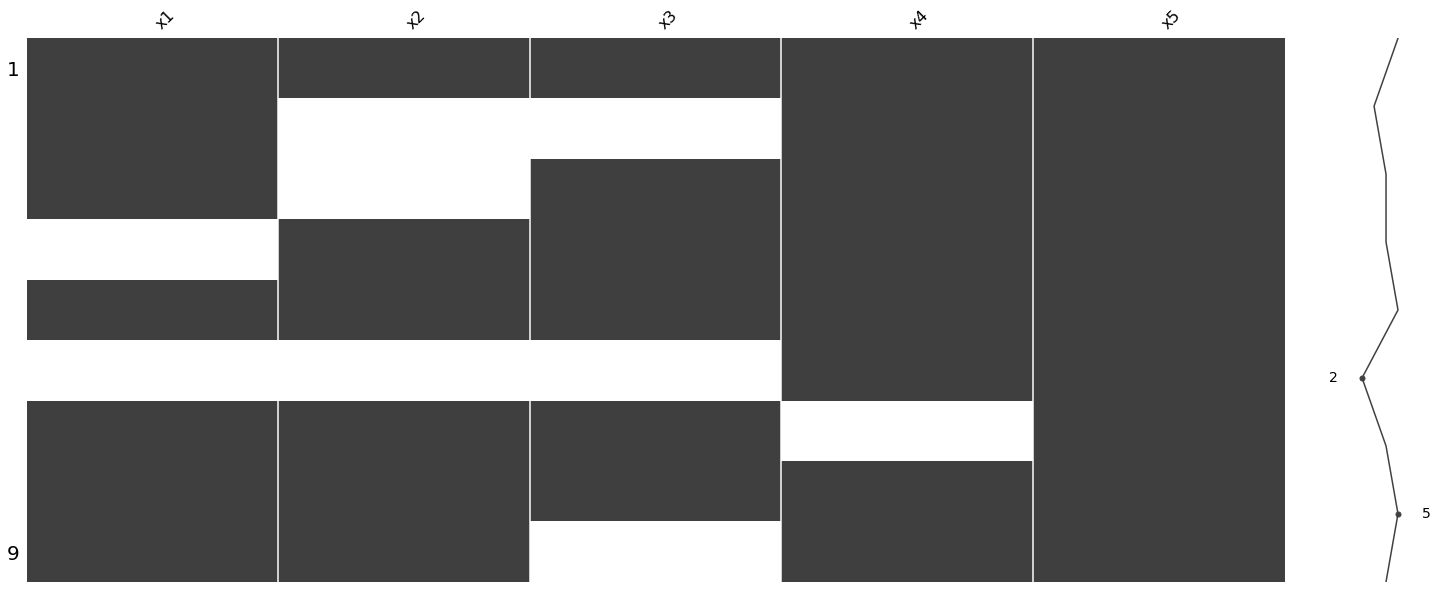

In [74]:
msno.matrix(tmp_frm)

<AxesSubplot:>

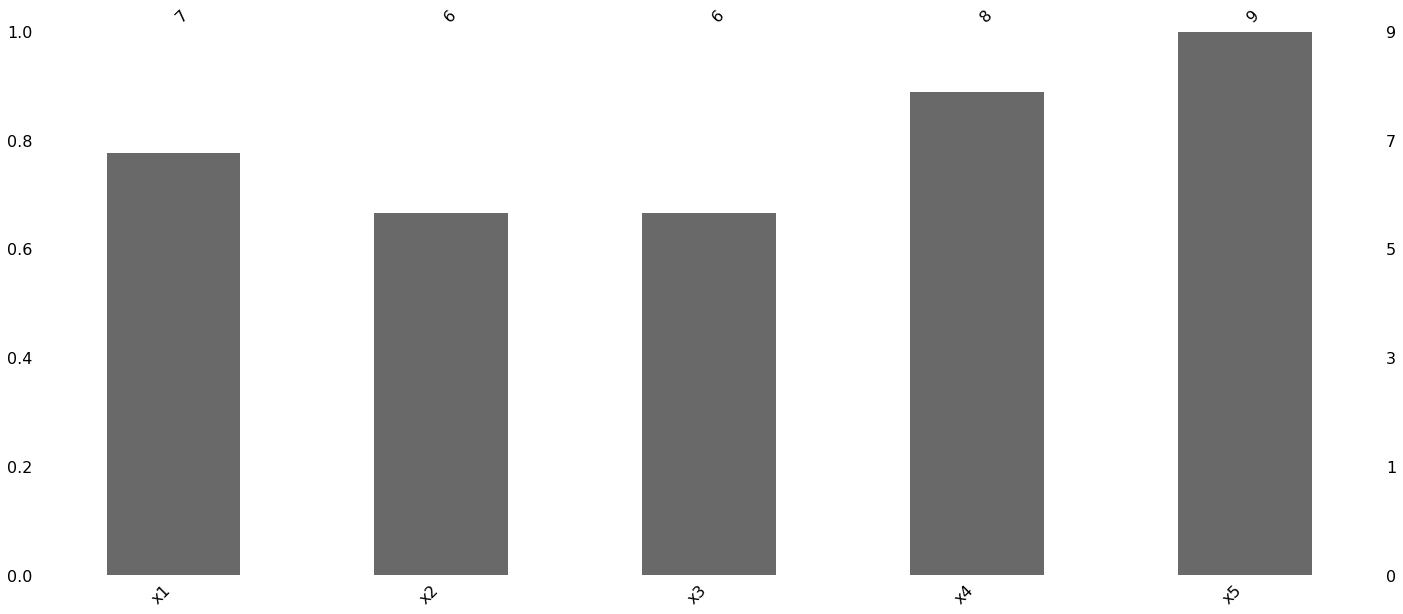

In [75]:
msno.bar(tmp_frm)

In [76]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [1]:
titanic['deck']
titanic.info()
titanic.describe() # 통계



NameError: name 'titanic' is not defined

NameError: name 'titanic' is not defined

In [82]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<AxesSubplot:>

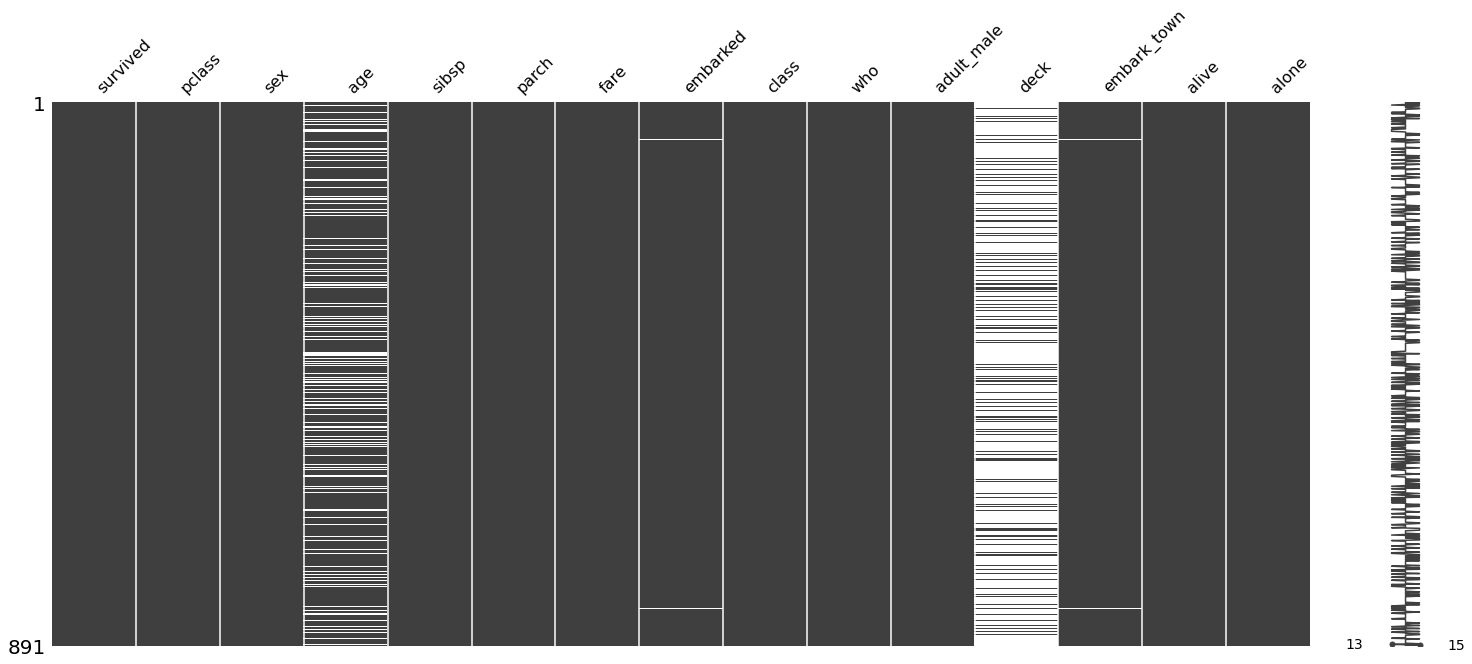

In [80]:
msno.matrix(titanic)

In [83]:
tmp_frm

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [84]:
from sklearn.impute import SimpleImputer

In [85]:
print('결측값을 드랍하지 않고 대체값(평균, 중앙, 최빈)으로 변경한다면 -')
print('fit_transform')
print()
imputer = SimpleImputer(strategy = 'most_frequent')

clean_frm = pd.DataFrame(imputer.fit_transform(tmp_frm), #내가 원하는 feature만 입력 가능 imputer.fit_transform('x1', 'x2')
                        columns = tmp_frm.columns)
clean_frm #한방에 결측값이 처리됨

결측값을 드랍하지 않고 대체값(평균, 중앙, 최빈)으로 변경한다면 -
fit_transform



,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,0.1,1.0,2019-01-02,B
2,3.0,0.1,3.0,2019-01-03,C
3,1.0,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,1.0,0.1,1.0,2019-01-06,C
6,7.0,0.7,7.0,2019-01-01,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,1.0,2019-01-09,C


titanic age의 결측값을 평균으로 대체한다면 - 


<AxesSubplot:>

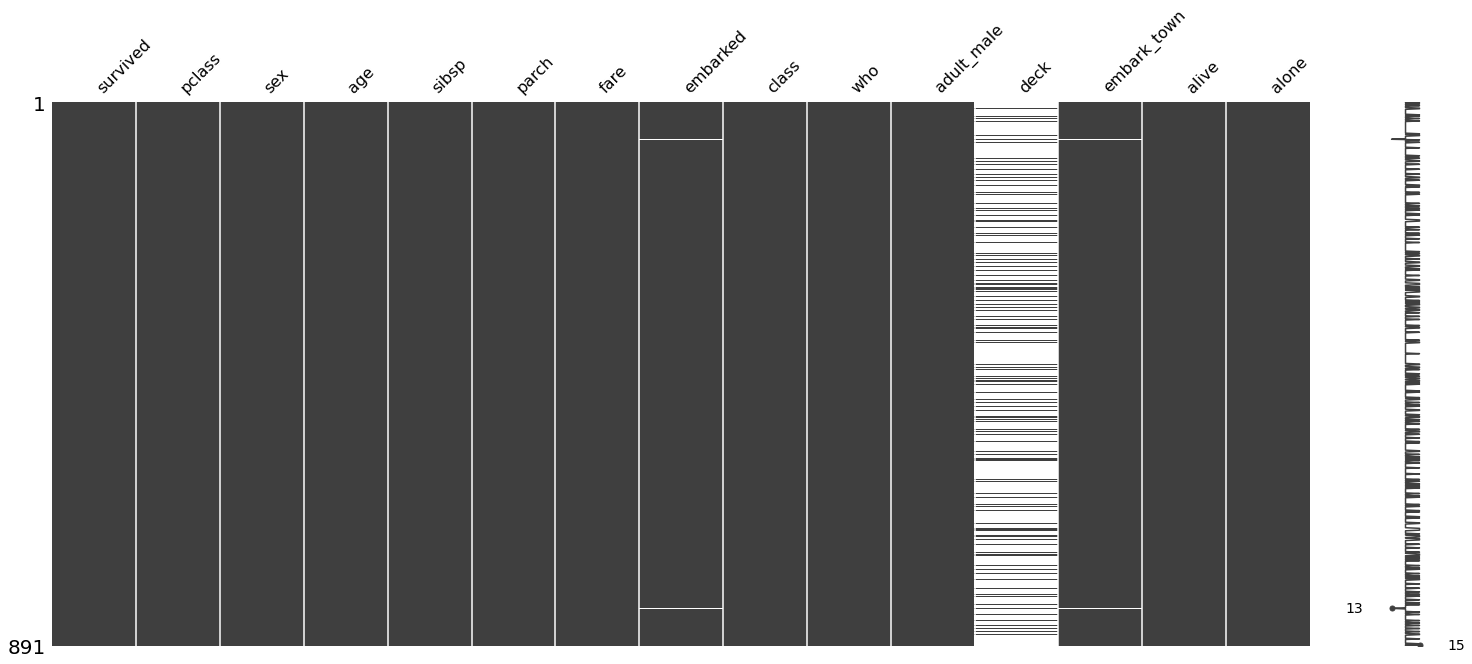

In [87]:
print('titanic age의 결측값을 평균으로 대체한다면 - ')
imputer = SimpleImputer(strategy = 'mean') # strategy 옵션 값 mean, most_frequent

titanic['age'] = imputer.fit_transform(titanic[['age']]) #fit_tranform은 데이터프레임만 인식하기 때문에 [['age']]로 만든다

msno.matrix(titanic)

<AxesSubplot:>

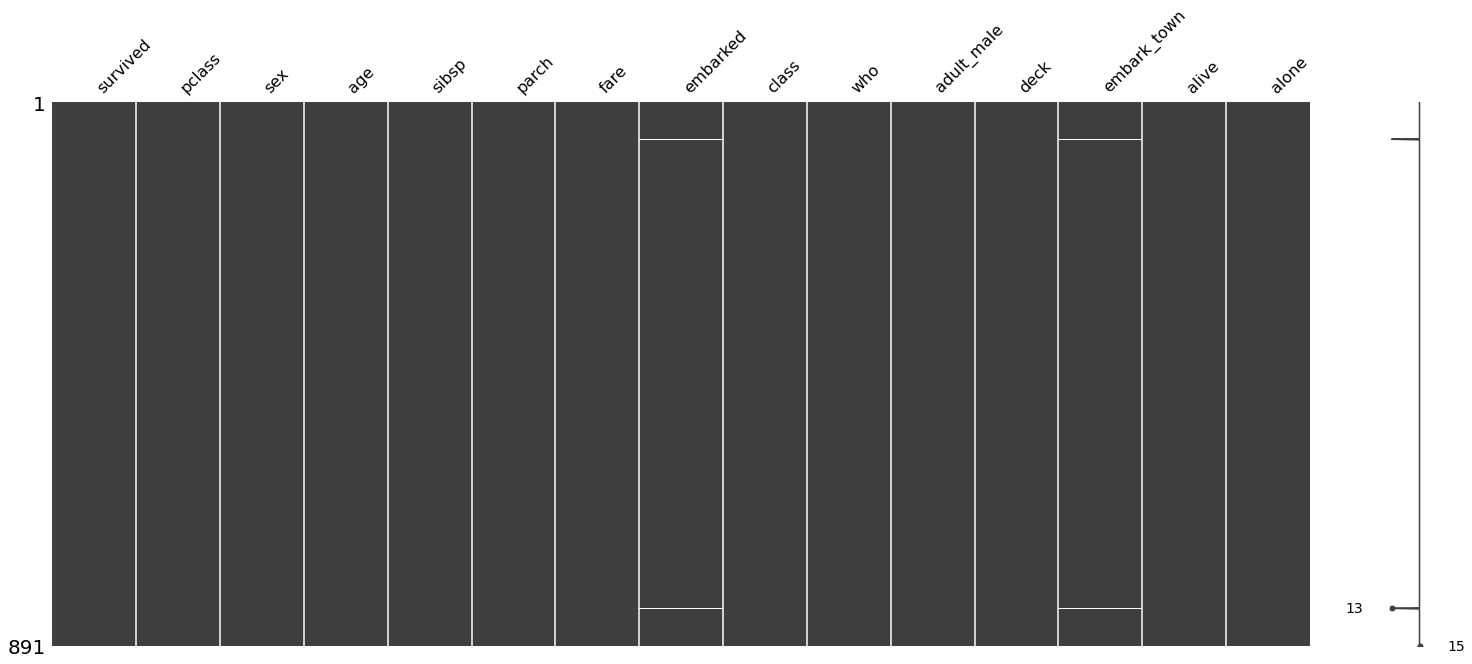

In [88]:
# 만약 SimpleImputer(strategy = 'mean') 옵션으로 결측값을 채우지 못한다면
# fillna를 쓸 것
titanic['deck'] = titanic['deck'].fillna('D')
msno.matrix(titanic)

In [103]:
print('표준화 - StandardScaler')

s_scaler = StandardScaler()
s_iris_frm = s_scaler.fit_transform(iris_frm)
s_iris_frm = pd.Da(data = s_iris_frm,
                   columns=iris.feature_names)
s_iris_frm

표준화 - StandardScaler


NameError: name 'iris_frm' is not defined

In [104]:
print('정규화 - MinMaxScaler')

m_scaler = MinMaxScaler()
m_iris_frm = s_scaler.fit_transform(iris_frm)
m_iris_frm = pd.Da(data = s_iris_frm,
                   columns=iris.feature_names)
s_iris_frm

정규화 - MinMaxScaler


NameError: name 'iris_frm' is not defined

## 스케일링시 주의할 점!!

## 스케일링 [실습]
- 스케일링 전 모델 학습
- 스케일링 후 모델 학습 - 정규화, 표준화

In [94]:
sample_frm = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv' , 
                                   header  = None , 
                                   usecols = [0, 2, 13])
sample_frm.columns = ['target', 'x', 'y'] #컬럼명 변경
sample_frm

,target,x,y
0,1,1.71,1065
1,1,1.78,1050
2,1,2.36,1185
3,1,1.95,1480
4,1,2.59,735
...,...,...,...
173,3,5.65,740
174,3,3.91,750
175,3,4.28,835
176,3,2.59,840


In [106]:
tips = sns.load_dataset('tips')
print('type -',type(tips))

type - <class 'pandas.core.frame.DataFrame'>


In [107]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [108]:
import matplotlib.pyplot as plt
%matplotlib inline #라인을 정상적으로 잡아주는 명령어

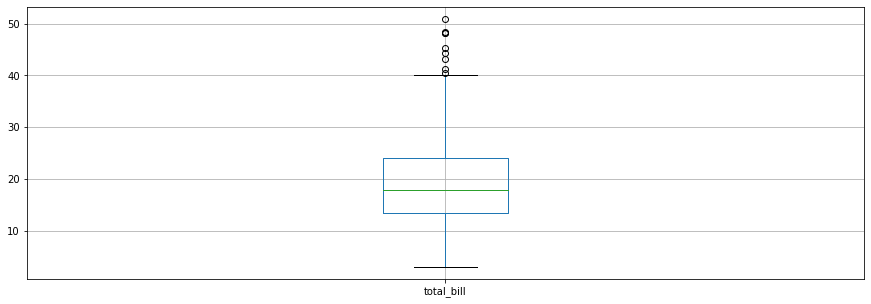

In [111]:
plt.figure(figsize=(15,5))

tips.boxplot(column = ['total_bill'])

plt.show()
plt.close()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


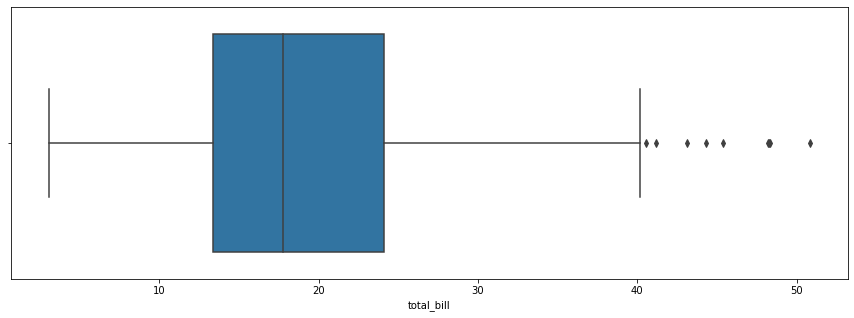

In [112]:
plt.figure(figsize=(15,5))

sns.boxplot(tips['total_bill'])

plt.show()
plt.close()

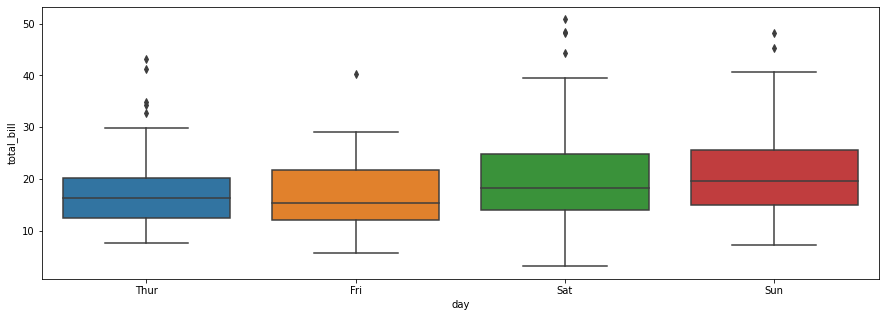

In [113]:
plt.figure(figsize=(15,5))

sns.boxplot(x = 'day',
            y = 'total_bill',
            data = tips)

plt.show()
plt.close()

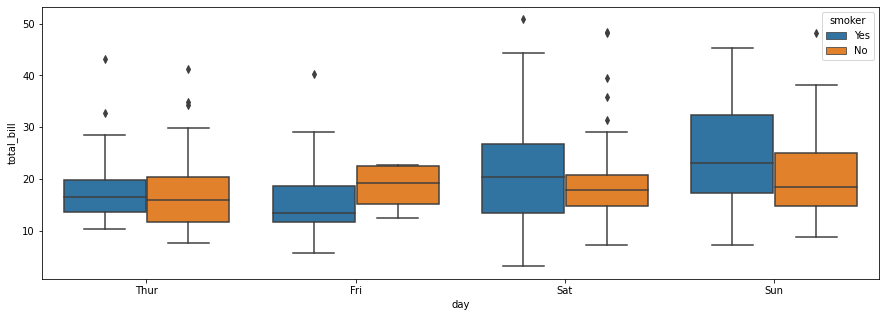

In [114]:
plt.figure(figsize=(15,5))

sns.boxplot(x = 'day',
            y = 'total_bill',
            hue = 'smoker',
            data = tips)

plt.show()
plt.close()

In [116]:
print('1. 이상치 값 제거')
print('2. 이상치 값 변환 - NaN 변환 훝 대체값으로 처리')
print('이상치를 제거하는 공식이 존재함')

1. 이상치 값 제거
2. 이상치 값 변환 - NaN 변환 훝 대체값으로 처리
이상치를 제거하는 공식이 존재함
